# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

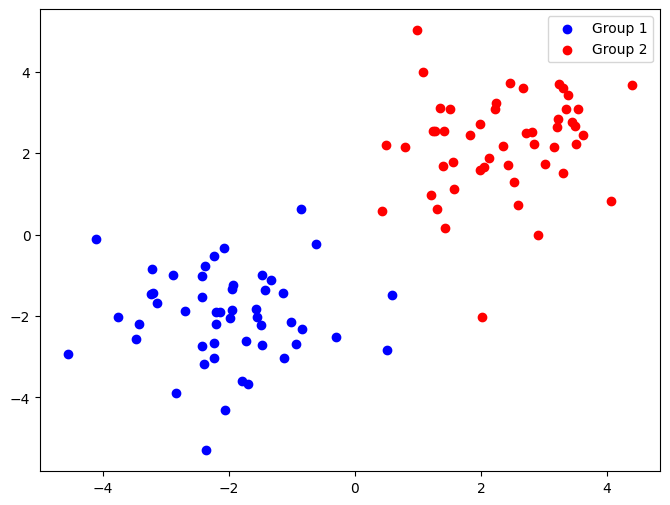

In [29]:
group1_x1 = np.random.normal(size=50, loc=-2)
group1_x2 = np.random.normal(size=50, loc=-2)

group2_x1 = np.random.normal(size=50, loc=2)
group2_x2 = np.random.normal(size=50, loc=2)

X = np.array([
    np.concatenate([group1_x1, group2_x1]),
    np.concatenate([group1_x2, group2_x2])
]).T
y = np.concatenate([np.zeros(50), np.ones(50)])

plt.figure(figsize=(8, 6))
plt.scatter(group1_x1, group1_x2, color="blue", label="Group 1")
plt.scatter(group2_x1, group2_x2, color="red", label="Group 2")
plt.legend()
plt.show()

# Model

Source:
- <a href="https://www.youtube.com/watch?v=YYEJ_GUguHw">AssemblyAI</a>

In [30]:
class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        return np.round(y_pred)

# Train

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0.])

# Evaluation

In [32]:
def accuracy(y_real, y_pred):
    return np.sum(y_real == y_pred) / len(y_real)

acc = accuracy(y_test, y_pred)

print(f"accuracy: {acc*100}%")

accuracy: 100.0%


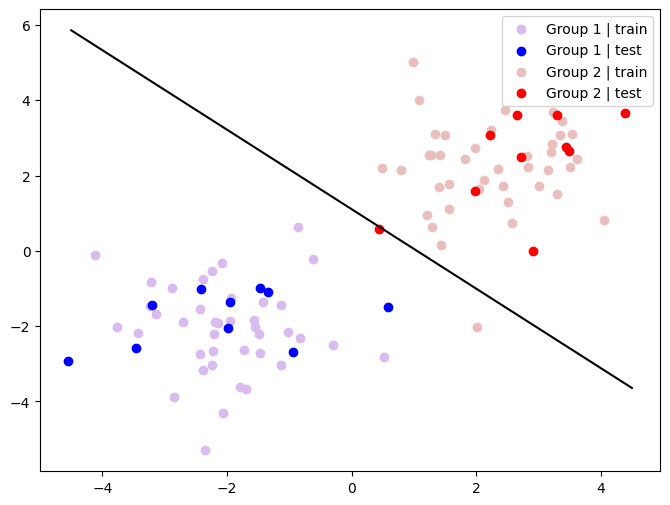

In [40]:
def dividingLine(x1):
    """Returns x2"""
    return -(logReg.weights[0]/logReg.weights[1])*x1 + (0.5 - logReg.bias)/logReg.weights[1]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_train[(y_train==0), 0], X_train[(y_train==0), 1],
    color="#d9bbf0",
    label="Group 1 | train"
)
plt.scatter(
    X_test[(y_test==0), 0], X_test[(y_test==0), 1],
    color="blue",
    label="Group 1 | test"
)
plt.scatter(
    X_train[(y_train==1), 0], X_train[(y_train==1), 1],
    color="#ebbebe",
    label="Group 2 | train"
)
plt.scatter(
    X_test[(y_test==1), 0], X_test[(y_test==1), 1],
    color="red",
    label="Group 2 | test"
)
plt.plot(np.linspace(-4.5, 4.5, 100), dividingLine(np.linspace(-4.5, 4.5, 100)), color="black")
plt.legend()
plt.show()